# CREATE GENOME NAMES MAPPER 
Create a dataframe mapping the genome name between original genomes, PanDelos, and Roary

In [218]:
import os
import numpy as np
import re
import pandas as pd 
import pyranges as pr
import re 
from collections import Counter
import matplotlib.pyplot as plt

# graphical stuff
plt.rcParams['figure.figsize'] = [6.0, 3.0]
plt.rcParams['figure.dpi'] = 300

species = 'fusobacterium_ulcerans' 

# set directories
basedir = '/'.join(os.getcwd().split('/')[:-1])
delosdir = basedir+species+'/PanDelos'
roarydir = basedir+species+'/Roary'
comparisondir = basedir+species+'/Comparison/'

os.makedirs(comparisondir,exist_ok=True)

In [219]:
genome_names = os.listdir(delosdir+'/output/fragmented')
matchfile='predictedCDSs_filtered_only_genes.bed'
dict_list_names = []

# read roary file to associate roary aliases to genome names
with open(roarydir+'/output/gene_presence_absence.csv') as f:
    lines = f.readlines()[0:2]
    colnames = lines[0]
    aliases = lines[1]
    
    colnames = colnames.split(',')
    indexes_prokka = [i for i,name in enumerate(colnames) if re.search("prokka", name)]
    colnames = np.array(colnames)[indexes_prokka]
    aliases = np.array(aliases.split(','))[indexes_prokka]
    aliases = [a.split('_')[0] for a in aliases]
    
    names_to_aliases_roary = {colnames[i].strip().strip('\"'):aliases[i].strip().strip('\"') for i,v in enumerate(colnames)}

# read pandelos file to associate pandelos aliases to genome name
for g in genome_names:
    files = os.listdir(delosdir+'/output/fragmented/' + g + '/artifacts')
    afile = [f for f in files if f.endswith(matchfile)][0]
    with open(delosdir+'/output/fragmented/' + g + '/artifacts/' +afile) as f:
        delos_name = f.readline().split('\t')[0]
        
    dict_row = {'genome':g, 'pandelos_name':delos_name, 'roary_name': names_to_aliases_roary['prokka_'+g]}
    dict_list_names.append(dict_row)

# add also complete genomes
ref_genome =  os.listdir(delosdir+"/output/complete")[0]
ref_delos=delos_name.split('reconstructed')[0]

ref = {'genome': ref_genome, 'pandelos_name':ref_delos, 'roary_name':names_to_aliases_roary['prokka_'+ref_genome]}
dict_list_names.append(ref)
names_df=pd.DataFrame(dict_list_names)
names_df

,genome,pandelos_name,roary_name
0,YuJ_2015__SZAXPI003428-6__bin.14.fa,NZ_CP028105.1reconstructed_MDXud,BBODIKCO
1,CosteaPI_2017__donald5-11-0-0__bin.9.fa,NZ_CP028105.1reconstructed_EgISM,BPKBGNKM
2,HeQ_2017__SZAXPI029496-97__bin.11.fa,NZ_CP028105.1reconstructed_jzAFB,EGBBNIFF
3,CosteaPI_2017__donald4-11-7-0__bin.5.fa,NZ_CP028105.1reconstructed_LT2av,NPFLPPNE
4,QinN_2014__LD-89__bin.13.fa,NZ_CP028105.1reconstructed_BTbiw,OECMOLHP
5,QinJ_2012__DLF008__bin.8.fa,NZ_CP028105.1reconstructed_CcsEr,ELPPMPPI
6,HeQ_2017__SZAXPI029541-107__bin.12.fa,NZ_CP028105.1reconstructed_iJUnM,LFMDLCGC
7,HeQ_2017__SZAXPI029546-133__bin.22.fa,NZ_CP028105.1reconstructed_hEQZO,GLONKDLE
8,LiJ_2014__O2.UC26-1__bin.16.fa,NZ_CP028105.1reconstructed_TQaKw,KJIHACMO
9,YuJ_2015__SZAXPI015232-18__bin.37.fa,NZ_CP028105.1reconstructed_w8gqC,GAOMJMOF


# Read in GFs

In [220]:
ref_to_genes_delos = dict() # #used for looking at the distribution of GF size, based on their gene in the  reference genome
gf_sizes_delos = dict() #used for looking at the distribution of GF size, regardless of their association to a common gene in the reference genome

# PanDelos
with open(delosdir+"/output.clus") as f:
        lines = f.readlines()

for l in lines:
    l = l.rstrip()
    l = l.split(' ')
    genome_set = set()
    selected_genes = []
    for gene in l:
        genome = gene.split(':')[0]

        if not re.search("reconstructed", gene): # if a gene is not reconstructed, hence is ref
            reference = gene
     
        if genome in genome_set:
            continue
        else:
            genome_set.add(genome)
            selected_genes.append(gene)
            
    ref_to_genes_delos[reference]= selected_genes #others
    
    if len(genome_set) in gf_sizes_delos.keys():
        gf_sizes_delos[len(genome_set)] += 1
    else:
        gf_sizes_delos[len(genome_set)] = 1

# Make pyranges compatible
dict_list=[]
 
for k in ref_to_genes_delos.keys(): 
    coords = k.split(':')[1]
    start = coords.split('-')[0]
    stop = '-'.join(coords.split('-')[1:3])
    strand = stop[len(stop)-2]
    stop = stop[:len(stop)-3] 
    dict_row = {'Chromosome':1,'Start':start,'End':stop,'Strand':strand, 'ID':k, 'Family':list(set(ref_to_genes_delos[k])), 'Family_size':len(list(set(ref_to_genes_delos[k])))}
    dict_list.append(dict_row)
pandelos_df=pd.DataFrame(dict_list) 

In [221]:
# Roary
gf_sizes_roary = dict()
roary_pres_abs = pd.read_csv(roarydir+'/output/gene_presence_absence.csv',na_filter=False)
gf_sizes_roary = Counter(roary_pres_abs['No. isolates'])

reference_df_roary=roary_pres_abs[roary_pres_abs['prokka_'+ref_genome]!='']
ref_to_genes_roary = dict()
ref_to_len_roary = dict()
for i in reference_df_roary.index:
    ref = reference_df_roary.loc[i,'prokka_'+ref_genome]
    fam = list(reference_df_roary.loc[i,reference_df_roary.columns.isin('prokka_'+names_df['genome'][:-1])].values)
    fam = [f for f in fam if f!= ''] 
    fam.append(ref)
    len_fam = len(fam)
    ref_to_genes_roary[ref]=fam
    ref_to_len_roary[ref]=len_fam

ref_to_genes_roary_df = pd.DataFrame(ref_to_genes_roary.items(), columns=['ID', 'Family'])
ref_to_genes_roary_df = pd.merge(ref_to_genes_roary_df,pd.DataFrame(ref_to_len_roary.items(), columns=['ID', 'Family_size']), on='ID')
reference_df_roary = pd.merge(reference_df_roary.loc[:,['Gene','prokka_'+ref_genome]],ref_to_genes_roary_df, left_on='prokka_'+ref_genome, right_on='ID')

## Import GFF to obtain coordinates of all ref genes + gene name + IDs
gff_file = roarydir+'/prokka_gffs/prokka_'+ref_genome+'.gff'
dict_list = [] 

with open(gff_file) as f:
    lines = f.readlines()
    for l in lines:
        if l.startswith('##FASTA'):
            break
        elif l.startswith('#'):
            continue
            
        l = l.split('\t')  
        start = int(l[3]) # #nb gtf starts indexing at 1
        stop = l[4]
        others = l[8]
        strand = l[6]
        others = others.split(';')
        ID = others[0].split('=')[1] 

        dict_row = {'Chromosome':1,'Start':start,'End':stop,'Strand':strand,'ID':ID} 
        dict_list.append(dict_row)
roary_gff_df=pd.DataFrame(dict_list)  

roary_gff_df=pd.merge(roary_gff_df,reference_df_roary, left_on="ID",right_on='ID')
roary_df=roary_gff_df.loc[:,['Chromosome','Start','End','Strand','ID','Gene','Family','Family_size']]

In [222]:
roary_df

,Chromosome,Start,End,Strand,ID,Gene,Family,Family_size
0,1,1,819,-,BOBJEOOC_00001,group_4333,"[MIFNILNM_01923, NPFLPPNE_01909, JFAFFFAD_0268...",26
1,1,816,1928,-,BOBJEOOC_00002,pepT_1,"[MIFNILNM_01924, NPFLPPNE_01910, JFAFFFAD_0268...",27
2,1,2111,3088,-,BOBJEOOC_00003,fba_2,"[MIFNILNM_01925, NPFLPPNE_01911, JFAFFFAD_0268...",27
3,1,3162,3635,-,BOBJEOOC_00004,group_4334,"[MIFNILNM_01926, NPFLPPNE_01912, JFAFFFAD_0268...",26
4,1,3619,4890,-,BOBJEOOC_00005,serS,"[MIFNILNM_01927, NPFLPPNE_01913, JFAFFFAD_0268...",28
...,...,...,...,...,...,...,...,...
3224,1,3535462,3535929,-,BOBJEOOC_03305,nrdR,"[MIFNILNM_01919, NPFLPPNE_01905, JFAFFFAD_0268...",25
3225,1,3535939,3536211,-,BOBJEOOC_03306,fruA_2,"[MIFNILNM_01920, NPFLPPNE_01906, JFAFFFAD_0268...",25
3226,1,3536231,3536410,-,BOBJEOOC_03307,group_1230,[BOBJEOOC_03307],1
3227,1,3536403,3537116,-,BOBJEOOC_03308,recO,"[MIFNILNM_01921, NPFLPPNE_01907, JFAFFFAD_0268...",21


## Plot GF size (regardless of reference genes)

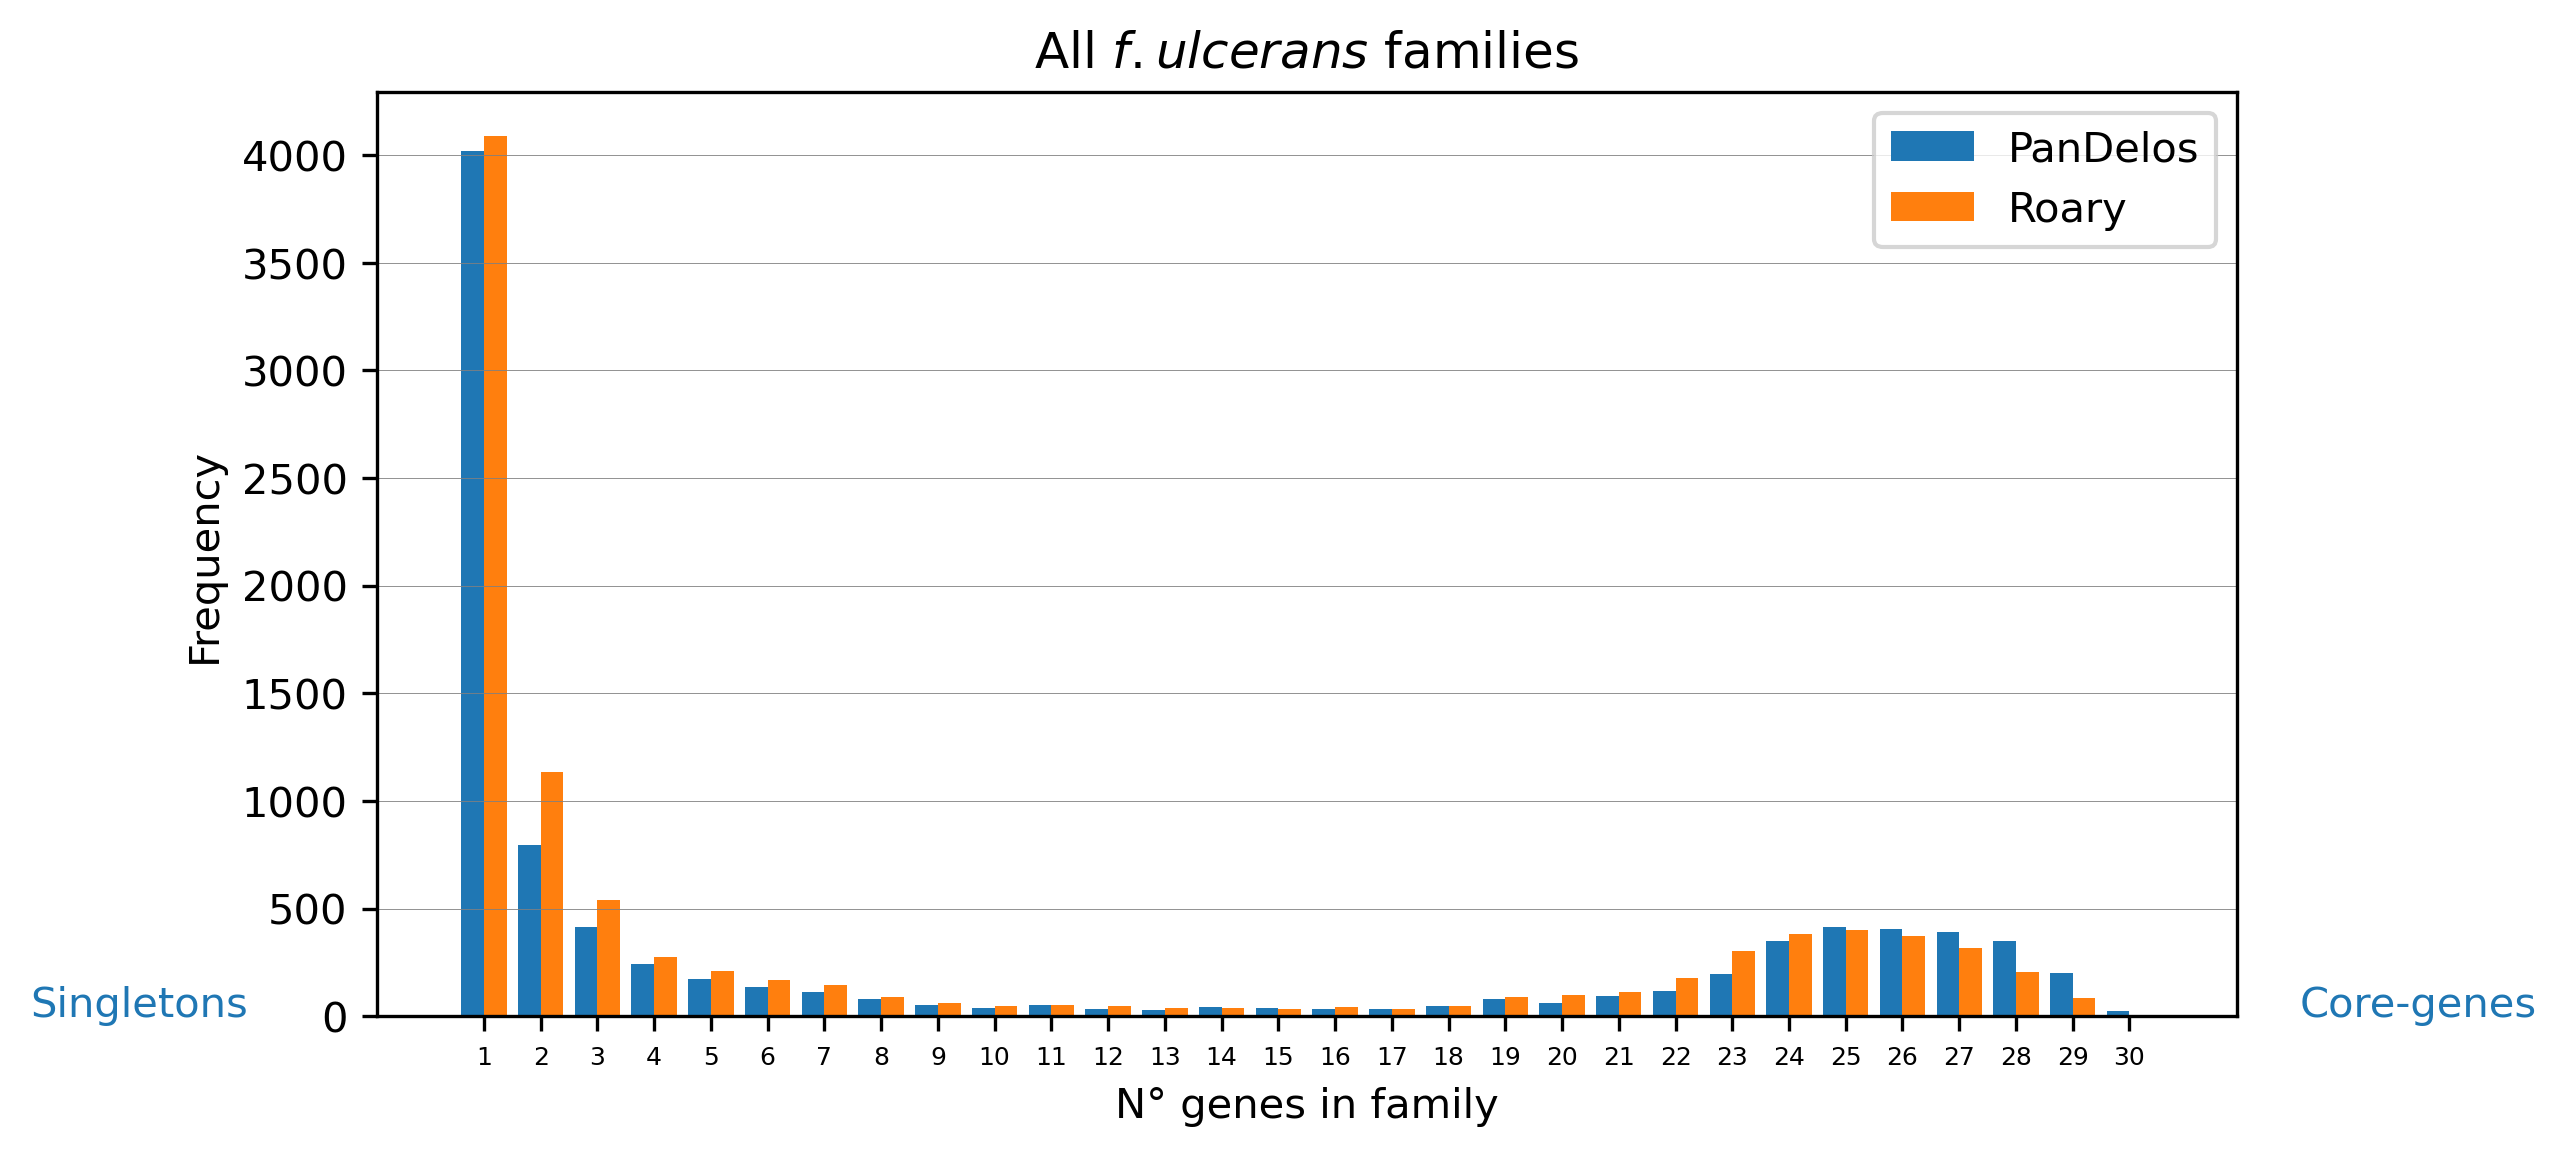

In [223]:
#PLot GF sizes
fig, axe = plt.subplots(figsize=(8,4), dpi=300)

eq = r"Singletons"
axe.text(-7, 0, eq, {'color': 'C0', 'fontsize': 10})
eq = r"Core-genes"
axe.text(33, 0, eq, {'color': 'C0', 'fontsize': 10})

plt.xlabel('N° genes in family')
plt.ylabel('Frequency')
plt.title('All $\it{f. ulcerans}$ families')  
plt.bar([l-0.2 for l in list(gf_sizes_delos.keys())],gf_sizes_delos.values(),0.4,label='PanDelos') 
plt.bar([l+0.2 for l in list(gf_sizes_roary.keys())],gf_sizes_roary.values(),0.4,label='Roary') 

plt.grid(True, axis='y', color = "grey", linewidth = "0.2")
plt.xticks(list(gf_sizes_delos.keys()),list(gf_sizes_delos.keys()),fontsize=6)
  
plt.legend(loc='upper right')
plt.show()

In [224]:
df = pd.DataFrame.from_dict(gf_sizes_delos,orient='index')
df_r = pd.DataFrame.from_dict(gf_sizes_roary,orient='index')

df_both = pd.merge(df, df_r, left_index=True, right_index=True)
df_both.columns = ['PanDelos-frags','Roary']
df_both = df_both.sort_index()

tot_pan = df_both['PanDelos-frags'].sum()
tot_roa = df_both['Roary'].sum()

df_both.loc[len(df_both.index)+1]  = [tot_pan,tot_roa]
df_both = df_both.rename(index={df_both.index[-1]: 'TOT'})

In [225]:
df_both

,PanDelos-frags,Roary
1,4019,4088
2,795,1132
3,413,539
4,243,275
5,173,209
6,136,169
7,110,146
8,80,88
9,54,59
10,38,48


## Matching by reference gene

In [226]:
roary_pr=pr.PyRanges(roary_df)
pandelos_pr=pr.PyRanges(pandelos_df)
joined=pandelos_pr.join(roary_pr,strandedness=None, report_overlap=True) 
joined=joined.as_df()
joined = joined.sort_values(by='Overlap',ascending=False)
joined = joined.drop_duplicates(subset='ID',keep='first')
joined

,Chromosome,Start,End,Strand,ID,Family,Family_size,Start_b,End_b,Strand_b,ID_b,Gene,Family_b,Family_size_b,Overlap
2248,1,1286189,1297061,-,NZ_CP028105.1:1286189-1297061(-),[NZ_CP028105.1reconstructed_jzAFB:1906270-1917...,23,1286190,1297061,-,BOBJEOOC_01188,group_643,"[PJBDGICL_01043, NFFDFBNB_01293, CMMDKCLP_0088...",4,10871
3630,1,3317087,3327890,-,NZ_CP028105.1:3317087-3327890(-),[NZ_CP028105.1reconstructed_DHwhA:3769355-3777...,22,3317088,3327890,-,BOBJEOOC_03097,group_644,"[MLIAGHKK_00617, BOBJEOOC_03097]",2,10802
1393,1,2763517,2773801,+,NZ_CP028105.1:2763517-2773801(+),[NZ_CP028105.1reconstructed_LT2av:4146359-4156...,6,2763518,2773801,+,BOBJEOOC_02595,group_37,[BOBJEOOC_02595],1,10283
1852,1,1088547,1098711,+,NZ_CP028105.1:1088547-1098711(+),[NZ_CP028105.1reconstructed_jzAFB:4495700-4496...,1,1088548,1098711,+,BOBJEOOC_00992,group_38,"[EGBBNIFF_02627, KJIHACMO_02700, ELPPBAIN_0116...",4,10163
645,1,1663171,1673200,+,NZ_CP028105.1:1663171-1673200(+),[NZ_CP028105.1reconstructed_EgISM:1943237-1953...,7,1663172,1673200,+,BOBJEOOC_01567,group_34,"[ELPPMPPI_00261, BOBJEOOC_01567]",2,10028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1,271395,271500,-,NZ_CP028105.1:271395-271500(-),[NZ_CP028105.1:271395-271500(-)],1,271396,271500,-,BOBJEOOC_00255,group_5184,[BOBJEOOC_00255],1,104
1831,1,2652741,2652843,+,NZ_CP028105.1:2652741-2652843(+),"[NZ_CP028105.1:2652741-2652843(+), NZ_CP028105...",4,2652742,2652843,+,BOBJEOOC_02480,group_2157,"[KAKDGIGM_00646, ELPPMPPI_01428, ELPPBAIN_0203...",4,101
1100,1,2274599,2274701,+,NZ_CP028105.1:2274599-2274701(+),[NZ_CP028105.1reconstructed_BTbiw:2711512-2711...,26,2274600,2274701,+,BOBJEOOC_02124,group_745,"[MIFNILNM_01220, NPFLPPNE_01085, HBDOHPHN_0137...",14,101
247,1,1399250,1399352,+,NZ_CP028105.1:1399250-1399352(+),[NZ_CP028105.1reconstructed_LT2av:2066493-2066...,3,1399251,1399352,+,BOBJEOOC_01288,group_4764,"[NPFLPPNE_01815, BPKBGNKM_00552, OCILCMAC_0256...",9,101


In [227]:
# Pandelos has missing overlap of:
missing=np.setdiff1d(np.array(pandelos_df['ID']), np.array(joined['ID']))
pandelos_df[pandelos_df['ID'].isin(missing)]  
len(pandelos_df[pandelos_df['ID'].isin(missing)])

1

In [228]:
#Roary has missing overlap of:
missing=np.setdiff1d(np.array(roary_df['ID']), np.array(joined['ID_b'])) 
roary_gff_df[roary_df['ID'].isin(missing)] 
len(roary_df[roary_df['ID'].isin(missing)]) 

21

## Compare GFs sizes

In [229]:
compare_mapping_genes = []
for g in joined['Gene']:
    p=joined.loc[joined['Gene'] == g,'Family_size'].values[0]
    r=joined.loc[joined['Gene'] == g,'Family_size_b'].values[0] 

    if p>r:
        flag='>'
    elif p<r:
        flag='<'
    else:
        flag='='
    dict_row = {'gene':g, 'GF_size_pandelos': p, 'GF_size_Roary':r,'Flag': flag}
    compare_mapping_genes.append(dict_row)
compare_mapping_genes = pd.DataFrame(compare_mapping_genes)
compare_mapping_genes

,gene,GF_size_pandelos,GF_size_Roary,Flag
0,group_643,23,4,>
1,group_644,22,2,>
2,group_37,6,1,>
3,group_38,1,4,<
4,group_34,7,2,>
...,...,...,...,...
3203,group_5184,1,1,=
3204,group_2157,4,4,=
3205,group_745,26,14,>
3206,group_4764,3,9,<


In [230]:
compare_mapping_genes.to_csv(comparisondir+'/comparison_GF_sizes.tsv')

Counter({'>': 1525, '=': 1404, '<': 279})


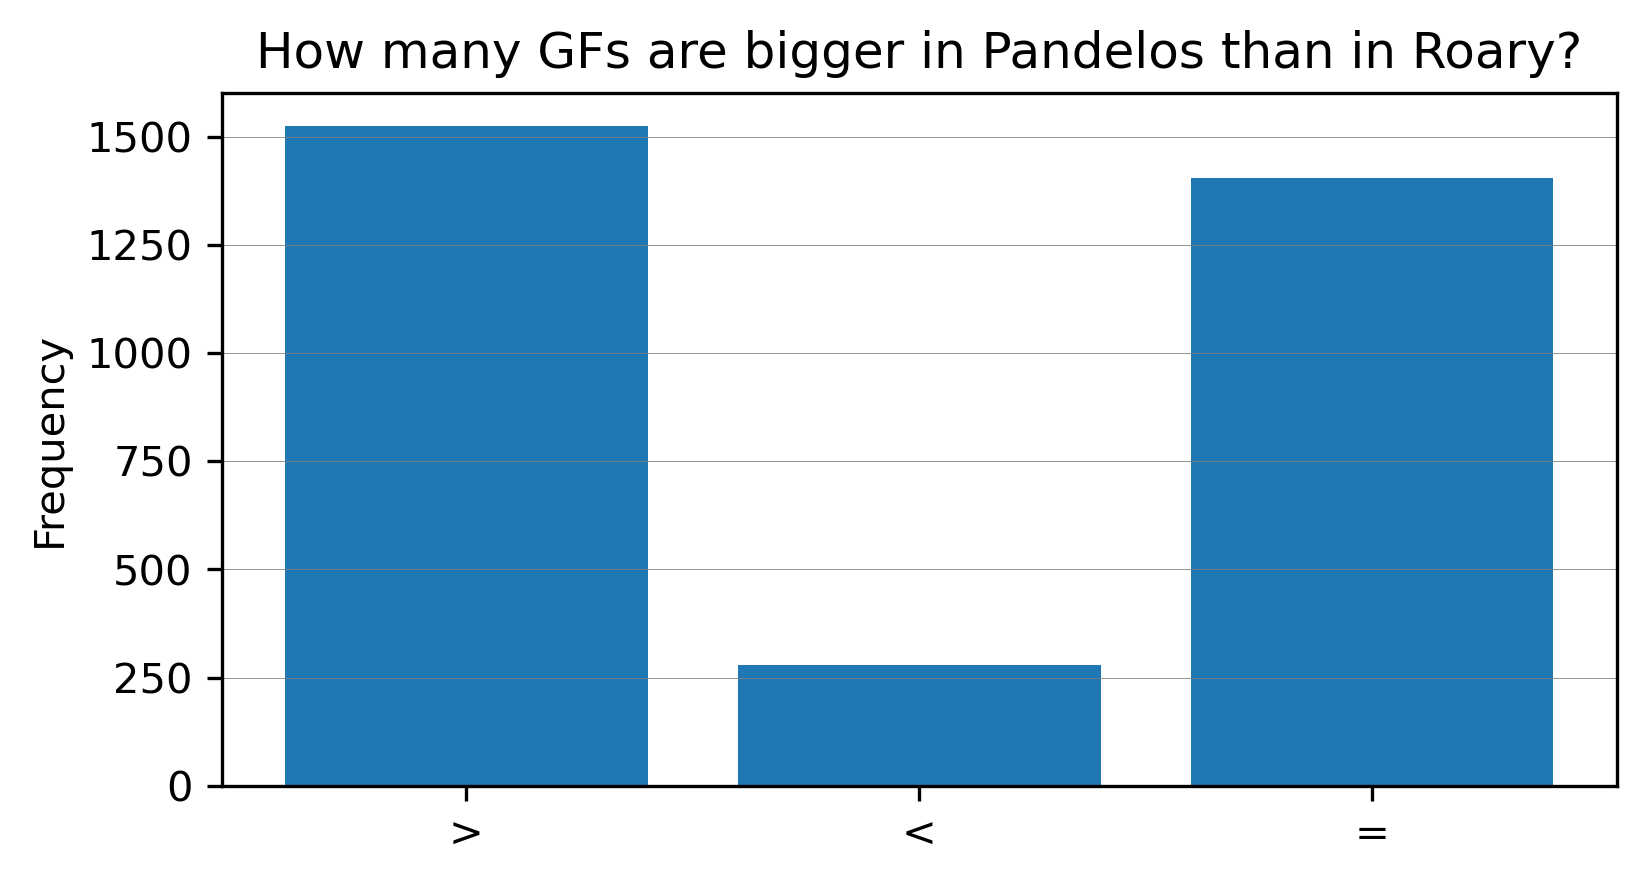

In [231]:
c=Counter(compare_mapping_genes['Flag'])
print(c)
plt.ylabel('Frequency')
plt.title('How many GFs are bigger in Pandelos than in Roary?')
plt.bar(c.keys(),c.values()) 
plt.grid(True, axis='y', color = "grey", linewidth = "0.2")

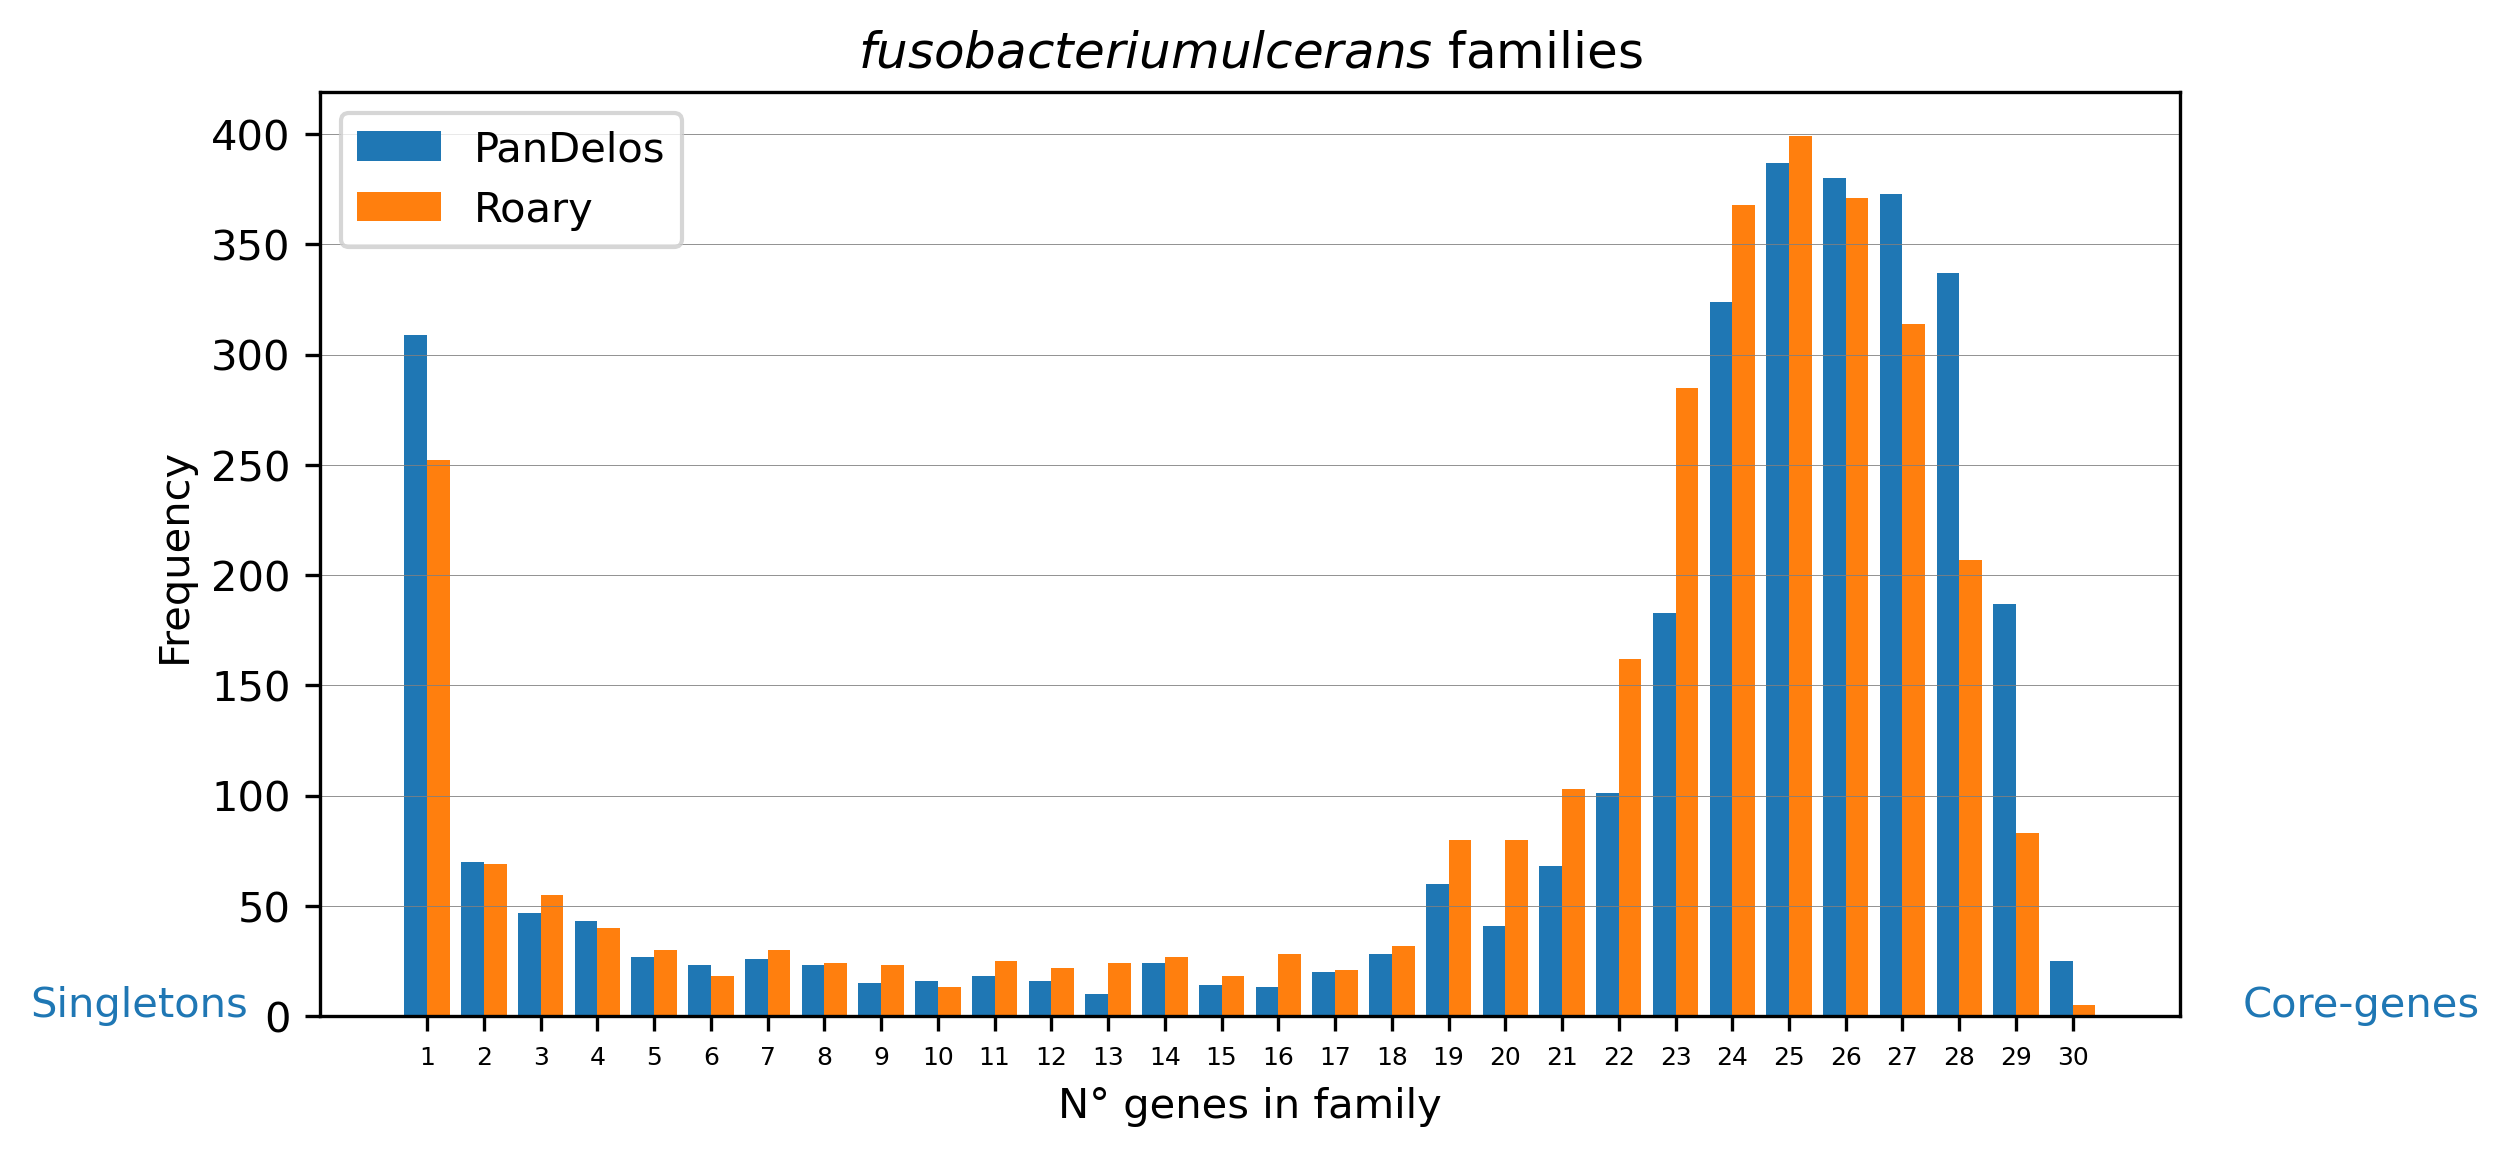

In [232]:
# Same plots as before but only with GFs mapped to each other
c_pan=Counter(compare_mapping_genes['GF_size_pandelos'])
c_roa=Counter(compare_mapping_genes['GF_size_Roary'])


#Together
fig, axe = plt.subplots(figsize=(8,4), dpi=300)

eq = r"Singletons"
axe.text(-6, 0, eq, {'color': 'C0', 'fontsize': 10})
eq = r"Core-genes"
axe.text(33, 0, eq, {'color': 'C0', 'fontsize': 10})

plt.xlabel('N° genes in family')
plt.ylabel('Frequency')
plt.title('$\it{fusobacterium ulcerans}$ families')

 
plt.bar([l-0.2 for l in list(c_pan.keys())],c_pan.values(),0.4,label='PanDelos') 
plt.bar([l+0.2 for l in list(c_roa.keys())],c_roa.values(),0.4,label='Roary') 

plt.grid(True, axis='y', color = "grey", linewidth = "0.2")
plt.xticks(list(c_pan.keys()),list(c_pan.keys()),fontsize=6)
  
plt.legend(loc='upper left')
plt.show()

In [233]:
df = pd.DataFrame.from_dict(c_pan,orient='index')
df_r = pd.DataFrame.from_dict(c_roa,orient='index')

df_both = pd.merge(df, df_r, left_index=True, right_index=True)
df_both.columns = ['PanDelos-frags','ROARY']
df_both = df_both.sort_index()

tot_pan = df_both['PanDelos-frags'].sum()
tot_roa = df_both['ROARY'].sum()

df_both.loc[len(df_both.index)+1]  = [tot_pan,tot_roa]
df_both = df_both.rename(index={df_both.index[-1]: 'TOT'})
df_both

,PanDelos-frags,ROARY
1,309,252
2,70,69
3,47,55
4,43,40
5,27,30
6,23,18
7,26,30
8,23,24
9,15,23
10,16,13


In [234]:
colors_18= ['#dcbeff', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6194b',
             '#9a6324','#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff']

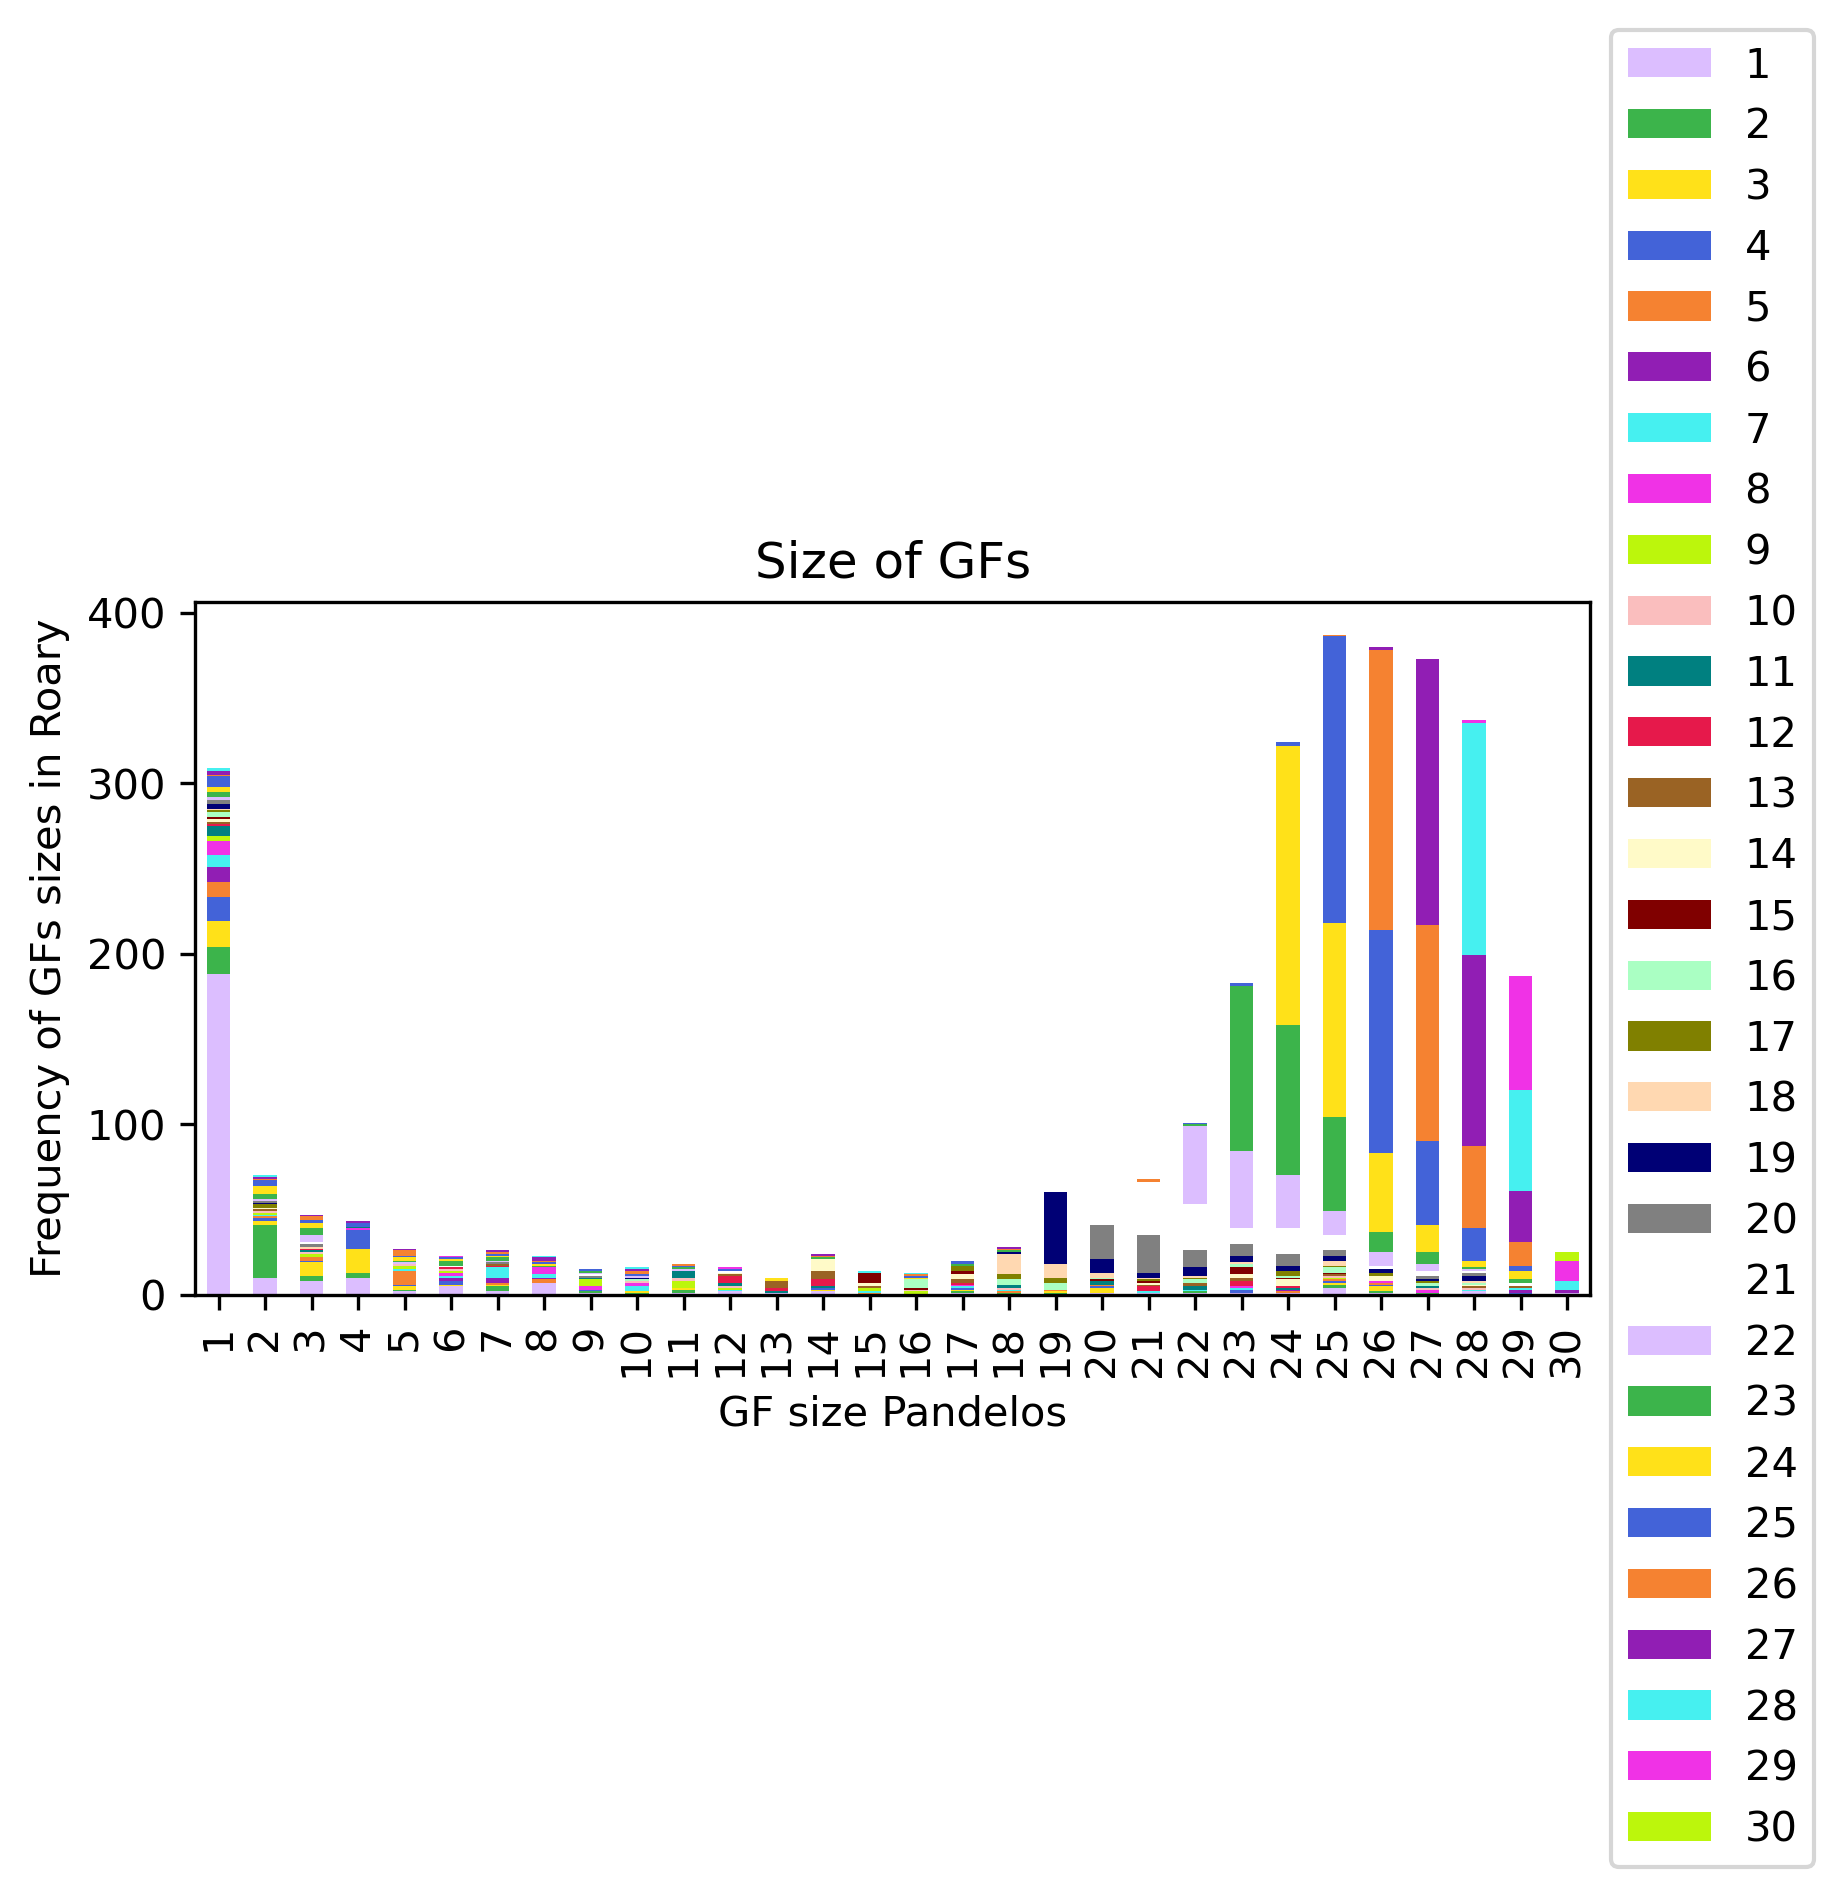

In [235]:

compare_mapping_genes['value']=1
compare_mapping_genes_stratify = compare_mapping_genes.pivot_table(columns='GF_size_Roary',index='GF_size_pandelos',values='value',aggfunc='sum').fillna(0)
#plot it 
compare_mapping_genes_stratify.plot(kind='bar',stacked=True,legend=True,
                                    color= colors_18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),labels=range(1,len(names_df)+1))
plt.ylabel('Frequency of GFs sizes in Roary')
plt.xlabel('GF size Pandelos')
plt.title('Size of GFs')
plt.show()


# Functional analysis preparation

In [236]:
# PREPARE FOR Diamond blastX: 
# For each GF, CHECK THE GENOMES THAT MAP AND THE ONES THAT DON'T. For all of them compute the blastx. split them into mapping and non-mapping
# steps:
# 1) create fasta files, ones for each GF, from panprova annotation
# 2) read them and map with blastx
# 3) split into roary-mapping and non-roary-mapping

# NB Requires coordinates of genes on fragmented genome, which is obtained by running get_fragment_coordinates.py + get_fragment_coordinates.sh

In [237]:
compare_mapping_genes_greater = compare_mapping_genes[compare_mapping_genes['Flag']=='>']

In [238]:
genes_pandelos_1 = np.array(compare_mapping_genes[(compare_mapping_genes['Flag'] == '>')]['gene']) 
pandelos_specific = dict()
for g in genes_pandelos_1 :
    pandelos_genomes_in_g = [f.split(':')[0] for f in joined[joined['Gene']==g]['Family'].values[0]]
    pandelos_genes_in_g = [f for f in joined[joined['Gene']==g]['Family'].values[0]]
    roary_genomes_in_g = [f.split('_')[0] for f in joined[joined['Gene']==g]['Family_b'].values[0]]
    roary_genomes_in_g_pandelostranslated = [names_df[names_df['roary_name']==p]['pandelos_name'].values[0] for p in roary_genomes_in_g]
    #print(joined[joined['Gene']==g]['Family_size'].values[0] - joined[joined['Gene']==g]['Family_size_b'].values[0]==len(pandelos_genomes_in_g)-len(set(roary_genomes_in_g_pandelostranslated)))
    dict_add = {pandelos_genes_in_g[i]:not (p in roary_genomes_in_g_pandelostranslated) for i,p in enumerate(pandelos_genomes_in_g)}
    pandelos_specific.update(dict_add)

In [239]:
df_pandelos_1 = joined[joined['Gene'].isin(genes_pandelos_1)]
frag_dir = delosdir+'/output/fragmented_coordinates/'
records_pan = {}
for d in os.listdir(frag_dir):
    with open(frag_dir+d+'/'+"coordinates_frag.sam") as f:
        lines = f.readlines()
        for l in lines:
            if l.startswith('@'):
                continue
            l = l.split('\t')
            name = l[0]
            seq = l[9]
            records_pan[name] = seq

ref_pandelos= {}
with open(delosdir+'/output/complete/'+ref_genome+'/gene_sequences.fna') as ref_file: 
    lines = ref_file.readlines()
    for l in lines:
        if l.startswith('>'):
            name = l.split('\t')[1]
        else:
            seq = l.strip()
        
        ref_pandelos[name] = seq
records_pan.update(ref_pandelos)

GF_dir = comparisondir+'/GFs'
os.makedirs(GF_dir,exist_ok=True)
os.makedirs(GF_dir+'/fasta',exist_ok=True)


for r in df_pandelos_1.index:
    gene = df_pandelos_1.loc[r,'Gene']
    #ID = df_pandelos_1.loc[r,'ID']
    genome_with_families = df_pandelos_1.loc[r,'Family'] 

    with open(GF_dir+'/fasta/'+gene+'.fa','w') as f:
        for g in genome_with_families:
            if g in pandelos_specific:
                if pandelos_specific[g]:
                    g_lab = g +'_PANSPECIFIC'
                else:
                    g_lab = g +'_GENERAL'
                f.write('>'+g_lab+'\n')
                f.write(str(records_pan[g])+'\n')

In [ ]:
import subprocess
faa_reference = roarydir+'/prokka/'+ref_genome+'*.faa'
print(subprocess.run([basedir+"/run_diamond.sh",species+" "+faa_reference], shell=True))